In [3]:
import numpy as np
import pandas as pd

In [9]:
# Step 1: Load the data
train_data = pd.read_csv('p2_train.csv', header=None)
test_data = pd.read_csv('p2_test.csv', header=None)

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
 1   1       10000 non-null  float64
 2   2       10000 non-null  float64
 3   3       10000 non-null  float64
dtypes: float64(4)
memory usage: 312.6 KB


In [15]:
train_data.shape

(10000, 4)

In [13]:
train_data.head()

,0,1,2,3
0,6.501996,-8.536983,3.422935,119980.220246
1,1.328383,8.943578,-8.145307,29890.224974
2,0.161478,-7.928351,1.628924,3245.579405
3,-8.989890,0.621330,-2.322925,411824.663771
4,5.185118,7.902611,7.559619,176097.137744


### Cleaning Dataset

In [17]:
# By using describe function checking for min, max, percentaile and outliers
train_data.describe()

,0,1,2,3
count,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,0.037700,-0.094496,0.000732,1.595370e+05
std,5.808542,5.804865,5.751570,2.523426e+05
min,-9.997617,-9.997204,-9.999185,1.139218e-06
25%,-5.008387,-5.111134,-4.955493,5.636481e+03
50%,0.083940,-0.240101,-0.085404,4.651950e+04
75%,5.023999,4.992062,5.014795,1.958409e+05
max,9.999251,9.997870,9.999567,2.187305e+06


In [18]:
#checking for null values
train_data.isnull().sum()
# both columns null count is 0 so no null values in dataset

0    0
1    0
2    0
3    0
dtype: int64

In [19]:
#ckecking for duplicate
train_data.duplicated().sum()

# count is zero so no duplicate

0

In [20]:
#checking for datatype in right format or not
train_data.dtypes

#datatype also in the right format and and also a strctured data.

0    float64
1    float64
2    float64
3    float64
dtype: object

In [24]:
#Split the data
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_model(model,X_train,y_train,X_test,y_test):
    #Fit the model on the training data
    model.fit(X_train,y_train)

    #predict the labels for the test data
    y_pred = model.predict(X_test)

    # Calculate mse and mae

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Return evaluation metrics
    return model,mse,mae

In [55]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [56]:
# Step 3: Train nonlinear regression models
# Support Vector Regression (SVR)
svr_regressor = SVR()
svr_model, svr_mse, svr_mae= evaluate_model(svr_regressor, X_train, y_train, X_test, y_test)
print(f"{svr_model}'s Metrics: ")
print(f"MSE: {svr_mse:.4f}, MAE: {svr_mae:.4f}")
print()

SVR()'s Metrics: 
MSE: 77888697059.8716, MAE: 150475.5911



In [58]:
dt_regressor = DecisionTreeRegressor()
dt_model, dt_mse, dt_mae= evaluate_model(dt_regressor, X_train, y_train, X_test, y_test)
print(f"{dt_model}'s Metrics: ")
print(f"MSE: {dt_mse:.4f}, MAE: {dt_mae:.4f}")
print()

DecisionTreeRegressor()'s Metrics: 
MSE: 777953396.4090, MAE: 13759.5166



In [59]:
# Random Forest Regression
rf_regressor = RandomForestRegressor()
rf_model, rf_mse, rf_mae= evaluate_model(rf_regressor, X_train, y_train, X_test, y_test)
print(f"{rf_model}'s Metrics: ")
print(f"MSE: {rf_mse:.4f}, MAE: {rf_mae:.4f}")
print()

RandomForestRegressor()'s Metrics: 
MSE: 316567724.3849, MAE: 8792.7192



In [60]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_reg_model = LinearRegression()
lr_model, lr_mse, lr_mae= evaluate_model(linear_reg_model, X_train, y_train, X_test, y_test)
print(f"{lr_model}'s Metrics: ")
print(f"MSE: {lr_mse:.4f}, MAE: {lr_mae:.4f}")
print()

LinearRegression()'s Metrics: 
MSE: 62332720766.1898, MAE: 172939.2987



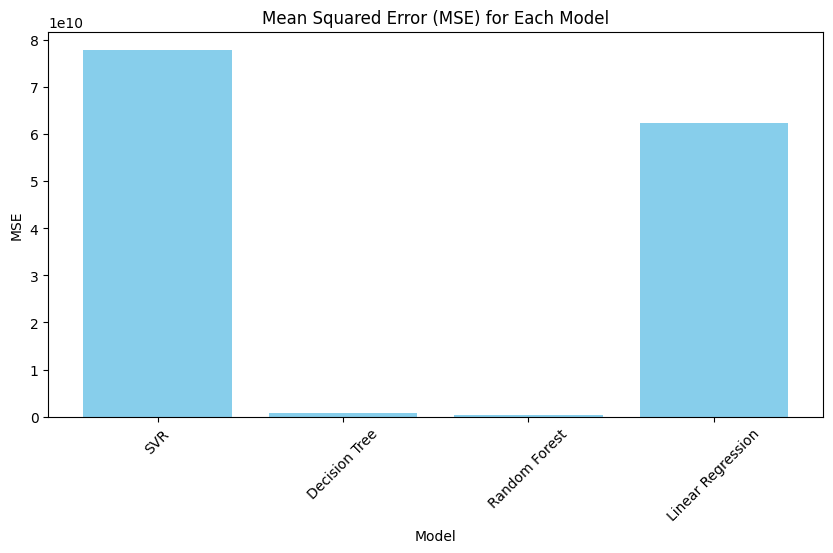

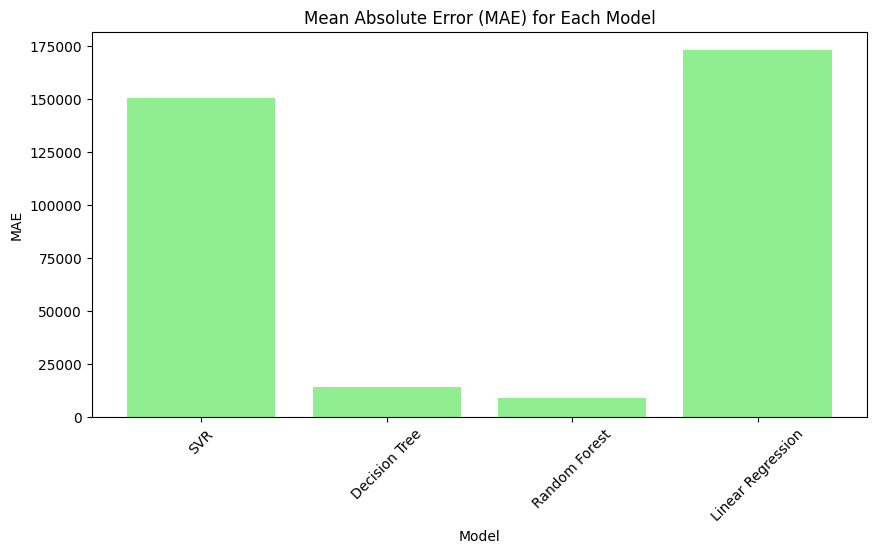

In [62]:
import matplotlib.pyplot as plt

# List of model names and corresponding MSE and MAE
model_names = ['SVR','Decision Tree', 'Random Forest','Linear Regression']
mse_values = [svr_mse, dt_mse, rf_mse, lr_mse]
mae_values = [svr_mae, dt_mae, rf_mae, lr_mae]

# Plotting MSE for each model
plt.figure(figsize=(10, 5))
plt.bar(model_names, mse_values, color='skyblue')
plt.title('Mean Squared Error (MSE) for Each Model')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.show()

# Plotting MAE for each model
plt.figure(figsize=(10, 5))
plt.bar(model_names, mae_values, color='lightgreen')
plt.title('Mean Absolute Error (MAE) for Each Model')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.show()